In [1]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

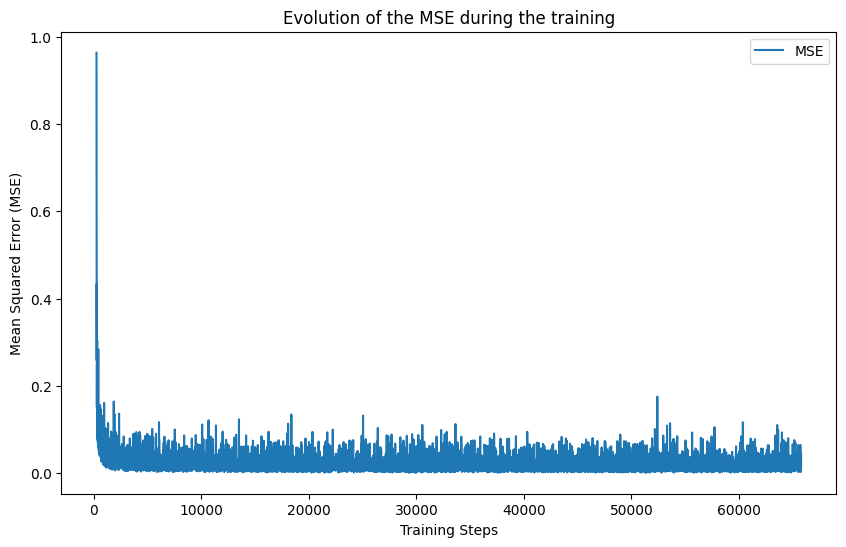

In [4]:
# Définir le chemin vers le dossier où les logs sont stockés
log_dir = r"D:\github\Academic-Projects\Diffusion_models\DDPM\runs\DDPM_Uncondtional"

# Charger l'événement TensorBoard
ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()

# Récupérer les valeurs MSE stockées
mse_values = ea.Scalars("MSE")

# Extraire les étapes (global_step) et les valeurs de MSE
steps = [entry.step for entry in mse_values]
mse = [entry.value for entry in mse_values]

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(steps, mse, label='MSE')
plt.xlabel('Training Steps')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evolution of the MSE during the training')
plt.legend()
plt.show()


In [4]:
# Fonction pour appliquer une moyenne mobile
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

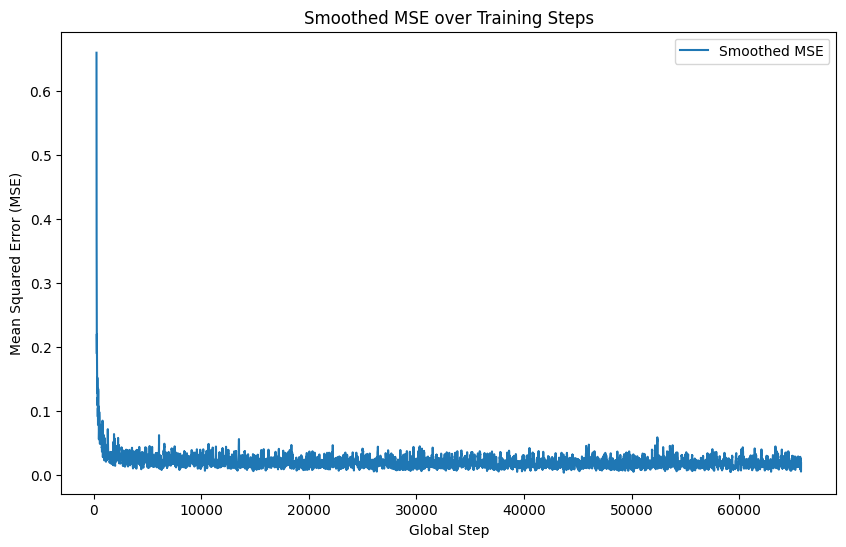

In [5]:
log_dir = r"D:\github\Academic-Projects\Diffusion_models\DDPM\runs\DDPM_Uncondtional"

ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()

# Récupérer les valeurs MSE stockées
mse_values = ea.Scalars("MSE")

# Extraire les étapes (global_step) et les valeurs de MSE
steps = [entry.step for entry in mse_values]
mse = [entry.value for entry in mse_values]

# Appliquer le lissage avec une moyenne mobile (window_size = 10 par exemple)
window_size = 5
smoothed_mse = moving_average(mse, window_size)
smoothed_steps = steps[:len(smoothed_mse)]  # Adapter les étapes au lissage

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(smoothed_steps, smoothed_mse, label='Smoothed MSE')
plt.xlabel('Global Step')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Smoothed MSE over Training Steps')
plt.legend()
plt.show()

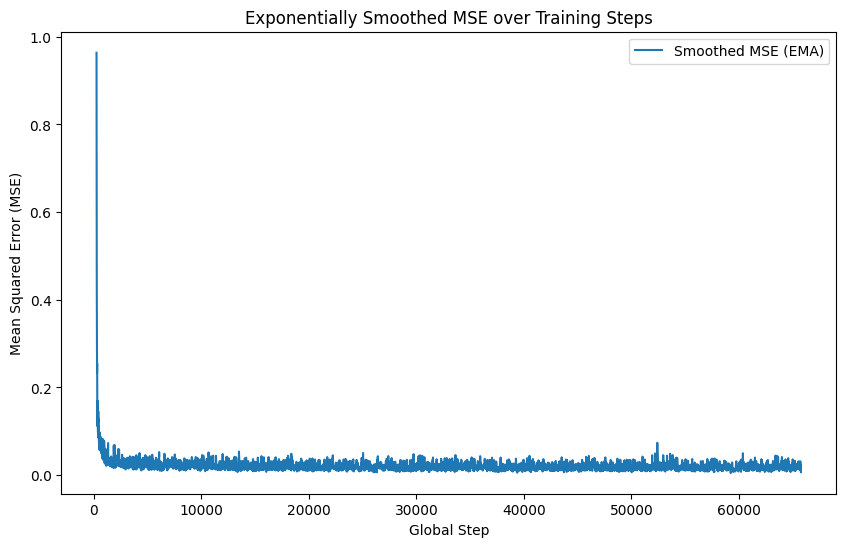

In [6]:
def exponential_moving_average(data, alpha=0.3):
    ema = [data[0]]  # Initialiser avec la première valeur
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

# Appliquer le lissage exponentiel (alpha = 0.3 par exemple)
alpha = 0.3
smoothed_mse = exponential_moving_average(mse, alpha)

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(steps, smoothed_mse, label='Smoothed MSE (EMA)')
plt.xlabel('Global Step')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Exponentially Smoothed MSE over Training Steps')
plt.legend()
plt.show()

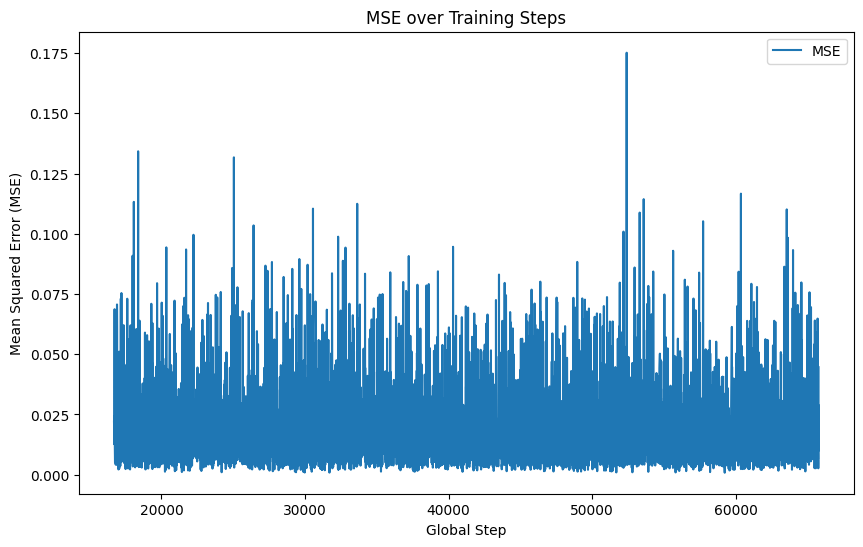

In [7]:
# Définir le chemin vers le dossier où les logs sont stockés
log_dir = r"D:\github\Academic-Projects\Diffusion_models\DDPM\runs\DDPM_Uncondtional"

# Charger l'événement TensorBoard
ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()

# Récupérer les valeurs MSE stockées
mse_values = ea.Scalars("MSE")

# Extraire les étapes (global_step) et les valeurs de MSE
steps = [entry.step for entry in mse_values]
mse = [entry.value for entry in mse_values]

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(steps[2500:], mse[2500:], label='MSE')
plt.xlabel('Global Step')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Training Steps')
plt.legend()
plt.show()
